# Analysing CRAN code

- [Tidy Tuesday site](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-11-12)
- [David Robinson's approach](https://www.youtube.com/watch?v=dr4qw8o0nYU)

### My code (after 1 hour)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# %load_ext lab_black

In [2]:
cran = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-11-12/loc_cran_packages.csv"
)

In [126]:
cran.describe()

,file,blank,comment,code
count,34477.000000,34477.000000,34477.000000,3.447700e+04
mean,11.165821,257.097775,432.708820,1.506400e+03
std,66.075754,2011.333988,2814.100058,1.255484e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,17.000000,1.000000,8.300000e+01
50%,3.000000,53.000000,33.000000,3.360000e+02
75%,10.000000,174.000000,284.000000,1.043000e+03
max,10737.000000,310945.000000,304465.000000,1.580460e+06


Text(0.5, 0, 'Number of blank lines')

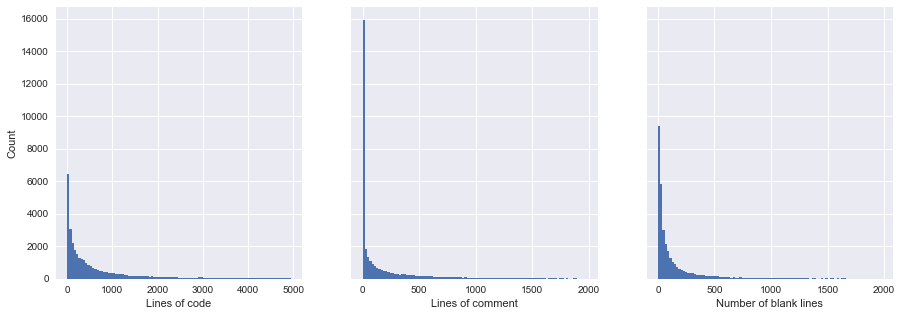

In [127]:
# Distribution of lines of code, comment, and empty lines

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

cran["code"].hist(bins=np.arange(0, 5000, 50), ax=ax0)
ax0.set_xlabel("Lines of code")
ax0.set_ylabel("Count")

cran["comment"].hist(bins=np.arange(0, 2000, 20), ax=ax1)
ax1.set_xlabel("Lines of comment")

cran["blank"].hist(bins=np.arange(0, 2000, 20), ax=ax2)
ax2.set_xlabel("Number of blank lines")

Text(0.5, 0, 'Number of packages')

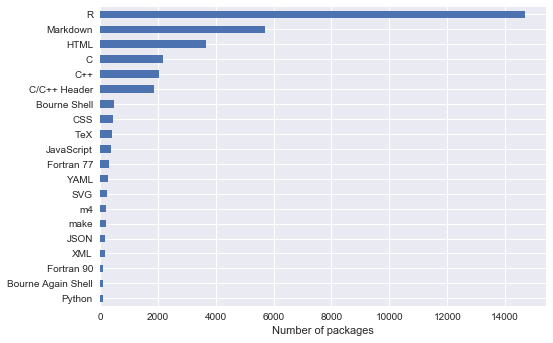

In [128]:
# Number of packages by language

counts = cran["language"].value_counts().head(20)
counts.sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Number of packages")

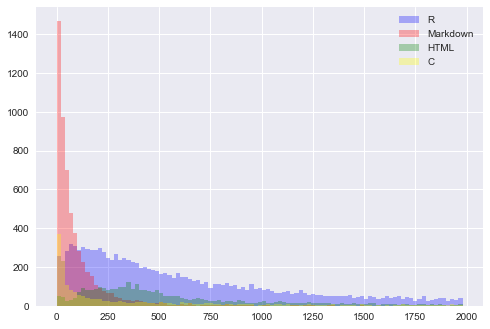

In [129]:
# Distributions of code length by language

top = counts.head(4)
colors = ["blue", "red", "green", "yellow"]

for idx, lang in enumerate(top.index):
    data = df[df["language"] == lang]
    data["code"].hist(
        bins=np.arange(0, 2000, 20), alpha=0.3, label=lang, color=colors[idx]
    )
plt.legend()

### Stuff based on David Robinson's approach

In [130]:
print(cran.shape)
cran.head()

(34477, 7)


,file,language,blank,comment,code,pkg_name,version
0,2,R,96,353,365,A3,1.0.0
1,1,HTML,347,5,2661,aaSEA,1.0.0
2,23,R,63,325,676,aaSEA,1.0.0
3,3,HTML,307,9,1275,abbyyR,0.5.5
4,30,R,224,636,587,abbyyR,0.5.5


In [88]:
# Summary stats by language

by_language = (
    cran.groupby("language")
    .agg(
        packages=("code", "count"),
        files=("file", "sum"),
        code=("code", "sum"),
        comment=("comment", "sum"),
    )
    .assign(
        lines_per_package=lambda df: df.code / df.packages,
        files_per_package=lambda df: df.files / df.packages,
        comment_code_ratio=lambda df: df.comment / df.code,
    )
    .sort_values("packages", ascending=False)
)
by_language

,packages,files,code,comment,lines_per_package,files_per_package,comment_code_ratio
language,,,,,,,
R,14689,267967,22822548,9414210,1553.716931,18.242699,0.412496
Markdown,5710,9036,636948,1,111.549562,1.582487,0.000002
HTML,3680,7893,4293856,32783,1166.808696,2.144837,0.007635
C,2162,13540,4764598,1171456,2203.791859,6.262720,0.245867
C++,2041,16442,3957771,817848,1939.133268,8.055855,0.206644
...,...,...,...,...,...,...,...
SWIG,1,5,2666,507,2666.000000,5.000000,0.190173
ActionScript,1,2,3110,0,3110.000000,2.000000,0.000000
PowerShell,1,1,3,0,3.000000,1.000000,0.000000


Text(0.5, 0, 'Number of packages written in langauge')

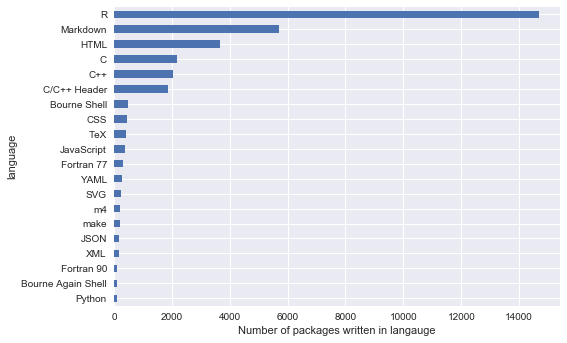

In [132]:
# Plot number of packages by language

by_language.head(20)["packages"].sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Number of packages written in langauge")

Text(0, 0.5, 'Comment to code ratio')

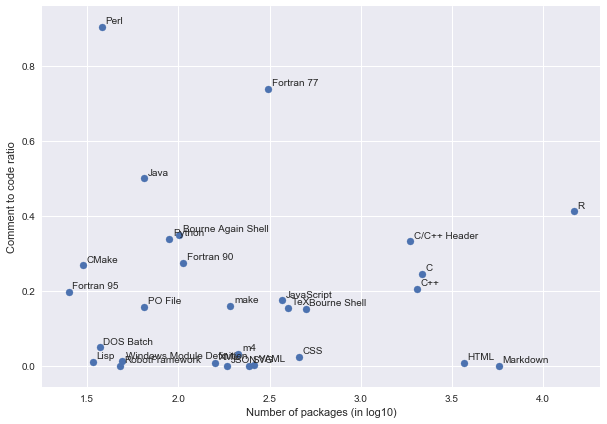

In [133]:
# Plot comment to code ratio

data = by_language.sort_values("packages", ascending=False).query("packages > 20")

x = data["packages"].transform("log10")
y = data["comment_code_ratio"]
label = data.index

plt.figure(figsize=(10, 7))
plt.scatter(x, y)

for x, y, label in zip(x, y, label):
    plt.text(x + 0.02, y + 0.01, label)

plt.xlabel("Number of packages (in log10)")
plt.ylabel("Comment to code ratio")

Text(0, 0.5, 'Lines per package')

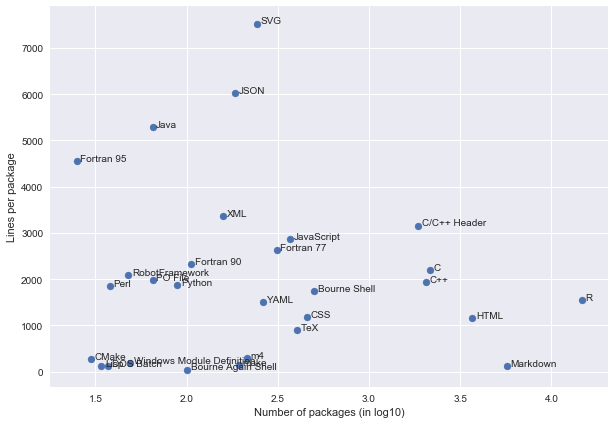

In [134]:
# Plot lines per package

data = by_language.sort_values("packages", ascending=False).query("packages > 20")

x = data["packages"].transform("log10")
y = data["lines_per_package"]
label = data.index

plt.figure(figsize=(10, 7))
plt.scatter(x, y)

for x, y, label in zip(x, y, label):
    plt.text(x + 0.02, y + 0.01, label)

plt.xlabel("Number of packages (in log10)")
plt.ylabel("Lines per package")

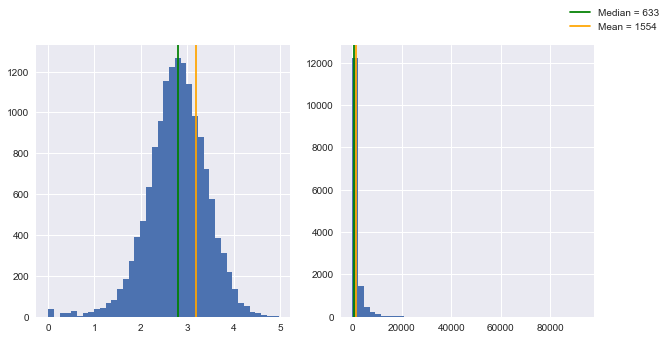

In [237]:
# How much R is there in each package?

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data = cran.query("language == 'R' & code > 0")["code"]

data.transform("log10").hist(bins=40, ax=ax1)
ax1.axvline(
    np.log10(data.median()),
    color="green",
    label="Median = {:2.0f}".format(data.median()),
)
ax1.axvline(
    np.log10(data.mean()), color="orange", label="Mean = {:2.0f}".format(data.mean())
)

data.hist(bins=40, ax=ax2)
ax2.axvline(data.median(), color="green")
ax2.axvline(data.mean(), color="orange")

fig.legend()

In [223]:
# Packages with most and least code

cran.sort_values("code", ascending=False).head(10)
# cran.sort_values("code", ascending=False).tail(5)

,file,language,blank,comment,code,pkg_name,version
2096,10737,C/C++ Header,310945,304465,1580460,BH,1.69.0-1
5647,27,SVG,0,0,1188625,dabestr,0.2.2
4753,39,JSON,0,0,481022,congressbr,0.2.1
30620,804,C++,59385,102574,385839,stringi,1.4.3
7649,20,HTML,17075,123,342681,edgarWebR,1.0.0
23897,294,JSON,1019,0,295553,rcorpora,2.0.0
5428,17,C/C++ Header,469,317,198162,cubature,2.0.3
28181,48,C,23053,79977,184799,seqminer,7.1
6836,913,C/C++ Header,46085,78546,183763,dlib,1.0.3
1750,159,C++,53470,26909,180621,BayesXsrc,3.0-1


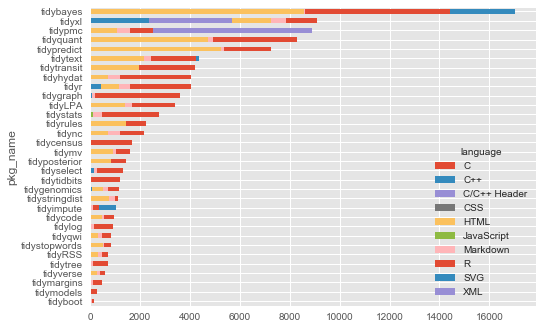

In [85]:
# Lines of code from different languages for tidyverse packages

plt.style.use('ggplot')
(cran[cran.pkg_name.str.contains("^tidy")]
 .groupby(["pkg_name", "language"]).code.sum()
 .unstack()
 .assign(tot=lambda x: x.sum(axis=1))
 .sort_values('tot').drop('tot', axis=1)
).plot.barh(stacked=True)

# Replicate above again from memory and as fast as I can while takling out lound tomorrow

tidy
False    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
True     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

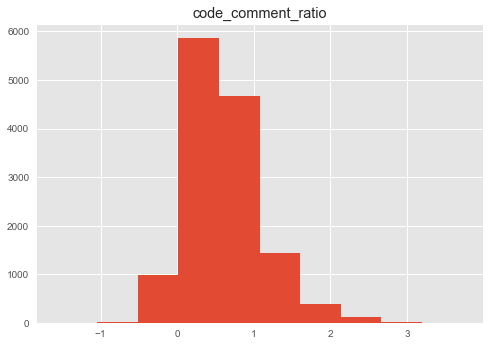

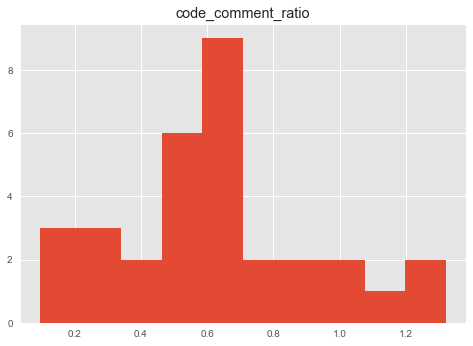

In [148]:
(cran.groupby('pkg_name').sum()
 .query('code > 100 & comment > 0')
 .assign(code_comment_ratio = lambda df: (df.code / df.comment).transform('log10'),
         tidy = lambda df: df.index.str.startswith('tidy')
        )
)[['tidy', 'code_comment_ratio']].groupby('tidy').hist(bins=10)

### Correlation between size and downloads 

In [149]:
downloads = pd.read_csv('http://cran-logs.rstudio.com/2020/2020-03-02.csv.gz')

In [152]:
print(downloads.shape)
downloads.head()

(5015440, 10)


,date,time,size,r_version,r_arch,r_os,package,version,country,ip_id
0,2020-03-02,16:12:36,817352,NaN,NaN,NaN,rlang,0.4.5,US,1
1,2020-03-02,16:15:07,65936,NaN,NaN,NaN,generics,0.0.2,GB,2
2,2020-03-02,16:15:00,461452,NaN,NaN,NaN,scatterplot3d,0.3-41,US,3
3,2020-03-02,16:13:46,202327,3.6.2,x86_64,mingw32,modelr,0.1.6,US,4
4,2020-03-02,16:10:55,20721,NaN,NaN,NaN,ColorPalette,1.0-1,US,5


In [177]:
# downloads_per_package = downloads.rename({'package': 'pkg_name', 'data':'downloads'}, axis=1).groupby('pkg_name').downloads.count()
downloads_per_package = downloads.rename({'package': 'pkg_name', 'data':'downloads'}, axis=1).groupby('pkg_name').downloads.count()

AttributeError: 'DataFrameGroupBy' object has no attribute 'downloads'

In [174]:
pd.merge(cran, downloads_per_package, on='pkg_name')

,file,language,blank,comment,code,pkg_name,version,date
0,2,R,96,353,365,A3,1.0.0,40
1,1,HTML,347,5,2661,aaSEA,1.0.0,17
2,23,R,63,325,676,aaSEA,1.0.0,17
3,3,HTML,307,9,1275,abbyyR,0.5.5,26
4,30,R,224,636,587,abbyyR,0.5.5,26
...,...,...,...,...,...,...,...,...
34146,1,Markdown,13,0,15,ztype,0.1.0,18
34147,10,R,121,221,447,ZVCV,1.0.0,8
34148,2,C++,20,7,70,ZVCV,1.0.0,8
34149,1,Markdown,7,0,11,ZVCV,1.0.0,8
